# A tensor approach for learning mixed membership models

In [124]:
import numpy as np
import scipy as sc
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
def visualize(adjacency_matrix):    
    plt.figure(figsize = (5,5))
    G = nx.from_numpy_matrix(adjacency_matrix)
    pos = nx.spring_layout(G) # use if spring_layout does not work graphviz_layout
    #labels = np.zeros((adjacency_matrix.shape[0],))
    labels = {}
    for i in xrange(adjacency_matrix.shape[0]):
        labels[i] = i
    nx.draw_networkx_labels(G,pos,labels)
    #weights = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color = "r")
    nx.draw_networkx_edges(G, pos,G.edges())

#### Create graph

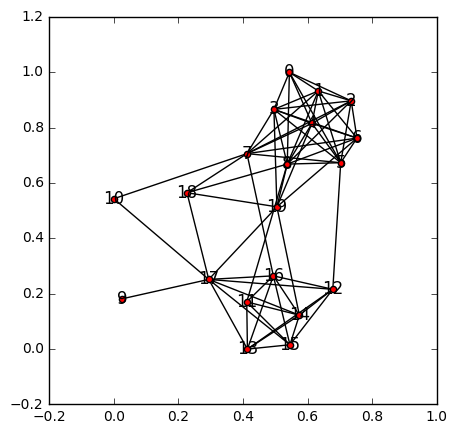

In [125]:
G = np.array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]])

G = G.T
visualize(G)

In [126]:
def partitionGraph(G):
    N = int(G.shape[0])
    X=np.arange(0,N,5)
    A=np.arange(1,N,5)
    B=np.arange(2,N,5)
    Y=np.arange(3,N,5)
    C=np.arange(4,N,5)
    return list(X),list(Y),list(A),list(B),list(C)
X,Y,A,B,C = partitionGraph(G)
print X,A

[0, 5, 10, 15] [1, 6, 11, 16]


In [127]:
def vec(a):
    k = len(a)
    v = np.zeros((k,1))
    v[:,0]=a
    return v

In [128]:
def submatrix(G,X,A):
    return G[X,][:,A]
G_XA = submatrix(G,X,A)
G_XB = submatrix(G,X,B)
G_XC = submatrix(G,X,C)

G_YA = submatrix(G,Y,A)
G_YB = submatrix(G,Y,B)
G_YC = submatrix(G,Y,C)

In [129]:
def submatrix_notX(G,X,A):
    not_X=[]
    n = int(G.shape[0])
    for i in np.arange(n):
        if not i in X:
            not_X.append(i) 
    return G[not_X,][:,A]
G_notAA = submatrix_notX(G,A,A)

In [130]:
def mu_vector(G,X,A):
    N = len(X)
    mu = np.zeros((len(A),1))
    mu[:,0] = np.sum(G[X,][:,A].T,axis=1)
    return mu/N
mu_XA = mu_vector(G,X,A)
mu_XB = mu_vector(G,X,B)
mu_XC = mu_vector(G,X,C)

mu_YA = mu_vector(G,Y,A)
mu_YB = mu_vector(G,Y,B)
mu_YC = mu_vector(G,Y,C)

In [131]:
def modified_submatrix(G_XA,alpha_0,mu_XA):
    return np.math.sqrt(alpha_0+1)*G_XA-(np.math.sqrt(alpha_0+1)-1)*np.ones((int(G_XA.shape[0]),1)).dot(mu_XA.T)
alpha_0 = 0.1
GM_XA= modified_submatrix(G_XA,alpha_0,mu_XA)
GM_XB= modified_submatrix(G_XB,alpha_0,mu_XB)
GM_XC= modified_submatrix(G_XC,alpha_0,mu_XC) 

In [132]:
def TensorT(G,X,A,B,C):
    N = len(X)
    lA,lB,lC = len(A),len(B),len(C)
    T = np.zeros((lA,lB,lC))
    for x in X:
        for i in xrange(lA):
            for j in xrange(lB):
                for k in xrange(lC):
                    T[i,j,k]+=G[x,i]*G[x,j]*G[x,k]
    return T/N

Tx = TensorT(G,X,A,B,C)
Ty = TensorT(G,Y,A,B,C)

In [133]:
def kron_product(a,b,c):
    lA,lB,lC = len(a),len(b),len(c)
    Tensor = np.zeros((lA,lB,lC))
    for i in xrange(lA):
        for j in xrange(lB):
            for k in xrange(lC):
                Tensor[i,j,k]=a[i]*b[j]*c[k]
    return Tensor

In [134]:
def modified_Tensor(G,X,A,B,C,G_XA,G_XB,G_XC,mu_XA,mu_XB,mu_XC,alpha_0):
    Tn = TensorT(G,X,A,B,C)*(alpha_0+1)*(alpha_0+2)
    Term1 = kron_product(mu_XA,mu_XB,mu_XC)*2*alpha_0**2
    Term2 = np.zeros((len(A),len(B),len(C)))
    Term3 = np.zeros((len(A),len(B),len(C)))
    Term4 = np.zeros((len(A),len(B),len(C)))
    
    for x in xrange(len(X)):
        Term2+=kron_product(G_XA[x,:].T,G_XB[x,:].T,mu_XC)
        Term3+=kron_product(G_XA[x,:].T,mu_XB,G_XC[x,:].T)
        Term4+=kron_product(mu_XA,G_XB[x,:].T,G_XC[x,:].T)
    Tsum = (Term2+Term3+Term4)*alpha_0*(alpha_0+1)/len(X)
    
    return (Tn+Term1-Tsum)
alpha_0 = 0.1
mTx = modified_Tensor(G,X,A,B,C,G_XA,G_XB,G_XC,mu_XA,mu_XB,mu_XC,alpha_0)
mTy = modified_Tensor(G,Y,A,B,C,G_YA,G_YB,G_YC,mu_YA,mu_YB,mu_YC,alpha_0)

In [135]:
def computeMoments(G,X,Y,A,B,C,alpha_0):
    
    G_XA = submatrix(G,X,A)
    G_XB = submatrix(G,X,B)
    G_XC = submatrix(G,X,C)
    
    mu_XA = mu_vector(G,X,A)
    mu_XB = mu_vector(G,X,B)
    mu_XC = mu_vector(G,X,C)
    
    GM_XA = modified_submatrix(G_XA,alpha_0,mu_XA)
    GM_XB = modified_submatrix(G_XB,alpha_0,mu_XB)
    GM_XC = modified_submatrix(G_XC,alpha_0,mu_XC)
    
    G_YA = submatrix(G,Y,A)
    G_YB = submatrix(G,Y,B)
    G_YC = submatrix(G,Y,C)
    
    mu_YA = mu_vector(G,Y,A)
    mu_YB = mu_vector(G,Y,B)
    mu_YC = mu_vector(G,Y,C)
    
    #TM = modified_Tensor(G,Y,A,B,C,G_XA,G_XB,G_XC,mu_XA,mu_XB,mu_XC,alpha_0)
    TM = modified_Tensor(G,Y,A,B,C,G_YA,G_YB,G_YC,mu_YA,mu_YB,mu_YC,alpha_0)
    return GM_XA, GM_XB, GM_XC, TM

GM_XA, GM_XB, GM_XC, mTy = computeMoments(G,X,Y,A,B,C,alpha_0)

In [136]:
def k_svd(A,k):
    u,s,v = sc.linalg.svd(A)
    return u[:,:k],np.diag(s[:k]),v[:k,:],np.dot(u[:,:k], np.dot(np.diag(s[:k]), v[:k,:]))

k = 2 # возможно k-svd не есть к - сообществ

N = len(X)
u1,s1,v1,_ = k_svd(GM_XA.T/np.math.sqrt(N),k)
u2,s2,v2,__ = k_svd(GM_XB.T/np.math.sqrt(N),k)
u3,s3,v3,___ = k_svd(GM_XC.T/np.math.sqrt(N),k)
Wa = u1.dot(np.linalg.inv(s1))
Wb = u2.dot(np.linalg.inv(s2))
Wc = u3.dot(np.linalg.inv(s3))

In [137]:
def Thres(A,tau):
    B = np.zeros_like(A)
    for i in xrange(int(A.shape[0])):
        for j in xrange(int(A.shape[1])):
            if A[i,j]>=tau:
                B[i,j]=A[i,j]
    return B

In [138]:
def computeR_AB(GM_XA,GM_XB,Wa,Wb,k):
    _,__,___,G_XA_k = k_svd(GM_XA,k)
    _,__,___,G_XB_k = k_svd(GM_XB.T,k)
    N = int(GM_XA.shape[0])
    return ((Wb.T.dot(G_XB_k)).dot(G_XA_k)).dot(Wa)/N

R_AB = computeR_AB(GM_XA,GM_XB,Wa,Wb,k)
R_AC = computeR_AB(GM_XA,GM_XC,Wa,Wc,k)

In [139]:
def concatenate(A,A_C,X,G):
    k = int(A.shape[0])
    n = int(G.shape[0])
    M = np.zeros((k,n))
    j = 0
    k = 0
    for i in xrange(n):
        if i in X:
            M[:,i]=A[:,k]
            k+=1
        else:
            M[:,i]=A_C[:,j]
            j+=1
    return M

In [140]:
def MultiLinearTransformation(T,V1,V2,V3):
    m1,m2,m3 = int(V1.shape[1]),int(V2.shape[1]),int(V3.shape[1])
    d1,d2,d3 = int(T.shape[0]),int(T.shape[1]),int(T.shape[2])
    M = np.zeros((m1,m2,m3))
    for i1 in xrange(m1):
        for i2 in xrange(m2):
            for i3 in xrange(m3):
                for j1 in xrange(d1):
                    for j2 in xrange(d2):
                        for j3 in xrange(d3):
                            M[i1,i2,i3]+=T[j1,j2,j3]*V1[j1,i1]*V2[j2,i2]*V3[j3,i3]
    return M
Tnew = MultiLinearTransformation(mTy,Wa,Wb.dot(R_AB),Wc.dot(R_AC))
V = Wa.T.dot(G_notAA.T)

In [141]:
def TensorEigen(Ten,V,N,ksi):
    K = int(Ten.shape[0])
    L = int(V.shape[1])
    teta = np.zeros((K,L))
    lambd = np.zeros(K,)
    phi = np.zeros((K,K))
    memory = np.zeros(L,)
    
    for i in xrange(K):
        for tau in xrange(L):
            teta[:,tau] = V[:,tau]
            for t in xrange(N):
                T_wave = np.array(Ten)
                for j in xrange(i):
                    if np.linalg.norm(lambd[j]*teta[:,tau].dot(phi[:,j]))>ksi:
                        T_wave = T_wave - lambd[j]*kron_product(phi[:,j],phi[:,j],phi[:,j])
                teta[:,tau]=MultiLinearTransformation(T_wave,np.eye(K),vec(teta[:,tau]),vec(teta[:,tau]))[:,0,0]
                if np.linalg.norm(teta[:,tau])!=0:
                    teta[:,tau]=teta[:,tau]/np.linalg.norm(teta[:,tau])
                
        for tau in xrange(L):
            memory[tau] = MultiLinearTransformation(T_wave,vec(teta[:,tau]),vec(teta[:,tau]),vec(teta[:,tau]))[0][0][0]
        t_star = np.argmax(memory)
        
        phi[:,i]=teta[:,t_star]
        for iter in xrange(N):
            phi[:,i]=MultiLinearTransformation(T_wave,np.eye(K),vec(phi[:,i]),vec(phi[:,i]))[:,0,0]
            if np.linalg.norm(phi[:,i])!=0:
                phi[:,i]=phi[:,i]/np.linalg.norm(phi[:,i])
        lambd[i]=MultiLinearTransformation(T_wave,vec(phi[:,i]),vec(phi[:,i]),vec(phi[:,i]))[0][0][0]
    return lambd,phi

N = 10
ksi = 0.4
eigenval, phi = TensorEigen(Tnew,V,N,ksi)

In [142]:
alpha = [1./eigenval[i]**2 for i in xrange(len(eigenval))]
EV = np.diag(eigenval)
EV_INV = np.linalg.inv(EV)

In [143]:
tau = -50.
G_AB=submatrix(G,A,B)
PI_AC = Thres(((EV_INV.dot(phi.T)).dot(Wa.T)).dot(G_notAA.T),tau)
PI_A = Thres((((EV_INV.dot(phi.T)).dot(R_AB.T)).dot(Wb.T)).dot(G_AB.T),tau)

In [144]:
def LearnPartitionCommunity(GM_XA,GM_XB,GM_XC,TM,G,X,Y,A,B,C,N,tau,ksi,k):
    #k = 3 # parameter for svd
    #Va,Sa,Ua_T,_ = k_svd(GM_XA/np.math.sqrt(int(GM_XA.shape[0])),k)
    #Vb,Sb,Ub_T,_ = k_svd(GM_XB/np.math.sqrt(int(GM_XB.shape[0])),k)
    #Vc,Sc,Uc_T,_ = k_svd(GM_XC/np.math.sqrt(int(GM_XC.shape[0])),k)
    
    #Ua,Ub,Uc = Ua_T.T,Ub_T.T,Uc_T.T
    Ua,Sa,Va_T,_ = k_svd(GM_XA.T/np.math.sqrt(len(X)),k)
    Ub,Sb,Vb_T,_ = k_svd(GM_XB.T/np.math.sqrt(len(X)),k)
    Uc,Sc,Vc_T,_ = k_svd(GM_XC.T/np.math.sqrt(len(X)),k)
    Wa = Ua.dot(sc.linalg.inv(Sa))
    Wb = Ub.dot(sc.linalg.inv(Sb))
    Wc = Uc.dot(sc.linalg.inv(Sc))
    
    R_AB, R_AC = computeR_AB(GM_XA,GM_XB,Wa,Wb,k),computeR_AB(GM_XA,GM_XC,Wa,Wc,k)
    T = MultiLinearTransformation(TM,Wa,Wb.dot(R_AB),Wc.dot(R_AC))
    G_notAA = submatrix_notX(G,A,A)
    
    eigenval, phi = TensorEigen(T,Wa.T.dot(G_notAA.T),N,ksi)
    print 'eval:\n', eigenval
    print 'evec:\n', phi
    alpha = [1./eigenval[i]**2 for i in xrange(len(eigenval))]
    EV = np.diag(eigenval)
    EV_INV = np.linalg.inv(EV)
    
    G_AB=submatrix(G,A,B)
    PI_AC = Thres(((EV_INV.dot(phi.T)).dot(Wa.T)).dot(G_notAA.T),tau)
    PI_A = Thres((((EV_INV.dot(phi.T)).dot(R_AB.T)).dot(Wb.T)).dot(G_AB.T),tau)
    
    
    PI = concatenate(PI_A,PI_AC,X,G)
    
    return PI, np.array(alpha)

In [145]:
def LearnMixedMembership(G,k,alpha_0,N,tau,ksi):
    # N is the number of iterations for Tensor Power Method
    n = int(G.shape[0])
    X,Y,A,B,C = partitionGraph(G)
    GM_XA, GM_XB, GM_XC, TM = computeMoments(G,X,Y,A,B,C,alpha_0)
    PI_hat, alpha_hat = LearnPartitionCommunity(GM_XA,GM_XB,GM_XC,TM,G,X,Y,A,B,C,N,tau,ksi,k)
    
    Q = np.zeros_like(PI_hat)
    d1 = int(PI_hat.shape[0])
    d2 = int(PI_hat.shape[1])
    for i in xrange(d1):
        Q[i,:] = (alpha_0+1)*PI_hat[i,:]/np.linalg.norm(PI_hat[i,:],1)-alpha_0/n*np.ones(d2,)
    P = (Q.dot(G)).dot(Q.T)
    
    return PI_hat,P,alpha_hat

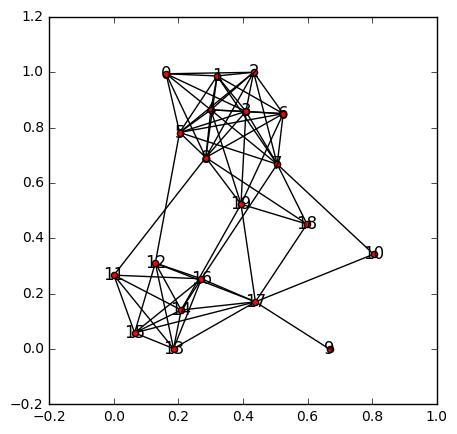

In [184]:
visualize(G)

eval:
[ 4.47894399  0.497136  ]
evec:
[[-0.61852071 -0.12769114]
 [ 0.7857685  -0.99181398]]


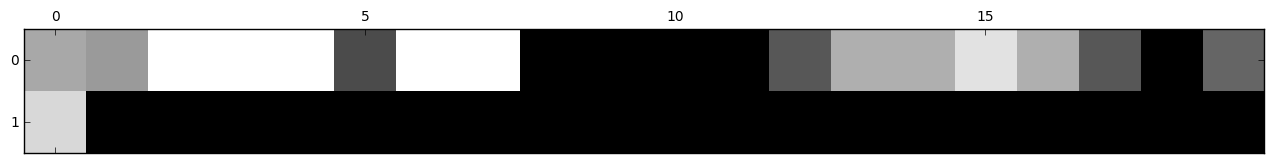

0 th node [ 0.20735256  0.26582542]
1 th node [ 0.18996838  0.        ]
2 th node [ 0.31443909  0.        ]
3 th node [ 0.31443909  0.        ]
4 th node [ 0.31443909  0.        ]
5 th node [ 0.09306784  0.        ]
6 th node [ 0.31443909  0.        ]
7 th node [ 0.31443909  0.        ]
8 th node [ 0.  0.]
9 th node [ 0.  0.]
10 th node [ 0.  0.]
11 th node [ 0.  0.]
12 th node [ 0.10758595  0.        ]
13 th node [ 0.21517189  0.        ]
14 th node [ 0.21517189  0.        ]
15 th node [ 0.27831779  0.        ]
16 th node [ 0.21517189  0.        ]
17 th node [ 0.10758595  0.        ]
18 th node [ 0.  0.]
19 th node [ 0.12447071  0.        ]


In [248]:
alpha_0 = 0.35
tau = -0.10
ksi = 0.1
N = 50
PI, P, alpha = LearnMixedMembership(G,2,alpha_0,N,tau,ksi)
plt.matshow(PI, cmap=plt.cm.gray)
plt.show()
for i in xrange(G.shape[0]):
    print i,'th node', PI[:,i]

In [148]:
def find_community(PI):
    indexes = []
    for i in xrange(int(PI.shape[1])):
        if np.linalg.norm(PI[:,i])!=0:
            indexes.append(i)
    return indexes
def visualize_detection(adjacency_matrix,PI):    
    plt.figure(figsize = (5,5))
    G = nx.from_numpy_matrix(adjacency_matrix)
    pos = nx.spring_layout(G) # use if spring_layout does not work graphviz_layout

    nx.draw_networkx_nodes(G, pos, node_size=20, node_color = "r")
    members = find_community(PI)
    
    nx.draw_networkx_nodes(G, pos, members, node_size=100, node_color = "b",node_shape='^')
    nx.draw_networkx_edges(G, pos,G.edges())

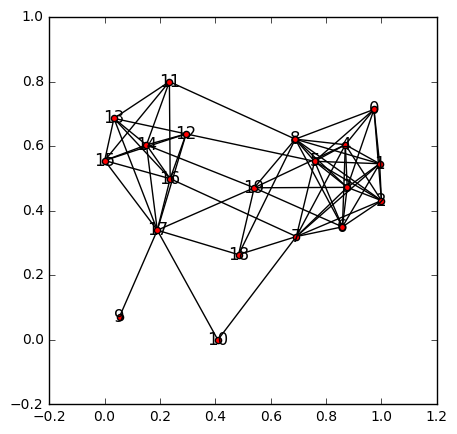

In [149]:
visualize(G)

In [260]:
from math import exp
NCommunities = 3
NNodes = 40
#Average community size
A = 6
epsilon = 0.3

#Node-Community Affilation matrix
NC = np.asarray([[0. for i in range(NNodes)] for j in range(NCommunities)])
for community in range(NCommunities):
    community_size = np.random.randint(A-2,A+3)
    for i in range(community_size):
        member = np.random.randint(0,NNodes)
        NC[community,member] = 1

#Weight matrix F
for i in range(NCommunities):
    for j in range(NNodes):
        if NC[i,j] != 0:
            NC[i,j] = 3*np.random.rand()
            
#plt.matshow(NC, fignum=100, cmap=plt.cm.gray)
#plt.show()

#Node-Node affilation matrix
NN = np.asarray([[0 for i in range(NNodes)] for j in range(NNodes)])
for i in range(NNodes):
    for j in range(NNodes):
        if i != j:
            F = sum([NC[k,i]*NC[k,j] for k in range(NCommunities)])
            measure = np.random.rand()
            if measure < 1. - exp(-F) or measure < epsilon:
                NN[i,j] = 1
                NN[j,i] = 1 

eval:
[ 2.01642885  0.83695998  0.3609902 ]
evec:
[[ 0.89094925  0.9129676  -0.73293048]
 [-0.31720532  0.17097631  0.51259989]
 [ 0.32494648 -0.37048248 -0.44727426]]


C:\Users\Shmulev\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in divide


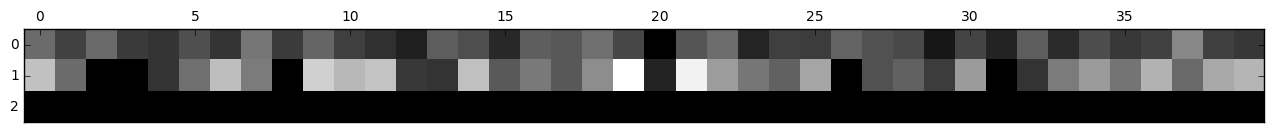

In [283]:
PI,P,alpha = LearnMixedMembership(NN,3,0.9,60,0.15,0.05)
plt.matshow(PI, fignum=100, cmap=plt.cm.gray)
plt.show()

eval:
[ 1.67833381  0.7460387   0.31751416]
evec:
[[ 0.8867516   0.97343042 -0.2036174 ]
 [ 0.33740593 -0.06912001 -0.61816896]
 [ 0.31595703 -0.21830173 -0.75921479]]


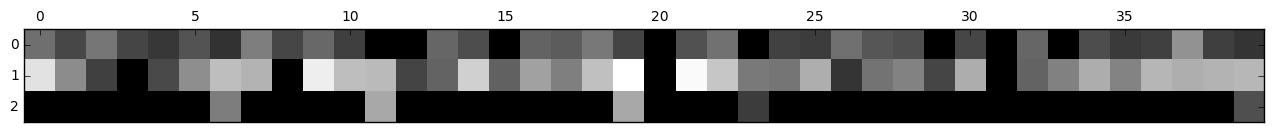

In [295]:
PI,P,alpha = LearnMixedMembership(NN,3,0.5,200,0.35,0.05)
plt.matshow(PI, fignum=100, cmap=plt.cm.gray)
plt.show()

In [296]:
for i in xrange(G.shape[0]):
    print i,'th node', PI[:,i]

0 th node [ 0.8662138   1.75507086  0.        ]
1 th node [ 0.55512157  1.08501232  0.        ]
2 th node [ 0.91725226  0.49862238  0.        ]
3 th node [ 0.53663918  0.          0.        ]
4 th node [ 0.42888811  0.57738403  0.        ]
5 th node [ 0.65027285  1.10637937  0.        ]
6 th node [ 0.39341568  1.4790174   0.96920531]
7 th node [ 0.98194922  1.38757725  0.        ]
8 th node [ 0.54231897  0.          0.        ]
9 th node [ 0.81117286  1.84509399  0.        ]
10 th node [ 0.49017787  1.47496125  0.        ]
11 th node [ 0.          1.44667224  1.30771708]
12 th node [ 0.          0.53163763  0.        ]
13 th node [ 0.79269046  0.77298373  0.        ]
14 th node [ 0.60327298  1.61642751  0.        ]
15 th node [ 0.          0.75944746  0.        ]
16 th node [ 0.77209192  1.25016714  0.        ]
17 th node [ 0.72009451  0.98843387  0.        ]
18 th node [ 0.93005486  1.49191946  0.        ]
19 th node [ 0.52698622  1.98245257  1.30213718]
